# LSTM (Long Short-Term Memory) Neural Network

### Import modules

In [1]:
import pandas as pd
import glob
import numpy as np
import sys
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

Using TensorFlow backend.


### Read in our dataframe and print the head

In [64]:
df = pd.read_csv('data/table_5.csv')
df.fillna(0, inplace = True)

print(df.head())

   activity  appCat.builtin  appCat.communication  appCat.entertainment  \
0  0.194919       14018.421             13106.589              2523.033   
1  0.195758       17947.665             10977.717              2481.042   
2  0.178188       16138.365             10227.168              2114.949   
3  0.166907       18882.663             10379.178              2596.956   
4  0.184079       20763.381             16983.687              2779.512   

   appCat.office  appCat.other  appCat.social  appCat.travel  appCat.unknown  \
0       1177.701      1524.471       2088.828       1605.474             0.0   
1       1383.021      1321.545       1993.173       2001.090             0.0   
2       1406.280      1092.156       1306.854       2455.134             0.0   
3       1428.516      1367.439       2004.513       2036.802             0.0   
4       1441.110      1553.658       2052.147       1736.133             0.0   

   appCat.utilities  call  circumplex.arousal  circumplex.valence   

### Convert data/target into numpy arrays

In [65]:
target = np.array(df['target_mood'], dtype = float)
del df['target_mood']
del df['patientno']
del df['period']
data = np.array(df, dtype = float)

### Show data/target shapes

In [66]:
print(data.shape)
print(target.shape)

(1151, 16)
(1151,)


### Split test/train datasets (set random_state for seeding)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 1)

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

### LSTM RNN model

In [68]:
rnn = Sequential()
rnn.add(LSTM((1), input_shape = (None, 16), return_sequences = False))
rnn.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 1)                 72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


### Fit the model and save it for re-training/fine-tuning later

In [74]:
history = rnn.fit(x_train, y_train, epochs=150, validation_data = (x_test, y_test))

Train on 920 samples, validate on 231 samples
Epoch 1/150
920/920 [==============================] - 0s 64us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 2/150
920/920 [==============================] - 0s 74us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 3/150
920/920 [==============================] - 0s 71us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 4/150
920/920 [==============================] - 0s 53us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 5/150
920/920 [==============================] - 0s 60us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 6/150
920/920 [==============================] - 0s 59us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 7/150
920/920 [==============================] - 0s 67us/step - loss: 7.0425 - acc: 0.0000e+00 -

920/920 [==============================] - 0s 61us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 59/150
920/920 [==============================] - 0s 59us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 60/150
920/920 [==============================] - 0s 97us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 61/150
920/920 [==============================] - 0s 62us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 62/150
920/920 [==============================] - 0s 57us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 63/150
920/920 [==============================] - 0s 59us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 64/150
920/920 [==============================] - 0s 68us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 65/150

920/920 [==============================] - 0s 82us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 116/150
920/920 [==============================] - 0s 74us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 117/150
920/920 [==============================] - 0s 84us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 118/150
920/920 [==============================] - 0s 79us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 119/150
920/920 [==============================] - 0s 82us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 120/150
920/920 [==============================] - 0s 102us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch 121/150
920/920 [==============================] - 0s 98us/step - loss: 7.0425 - acc: 0.0000e+00 - val_loss: 7.1141 - val_acc: 0.0000e+00
Epoch

### Predict x-test and plot against y-test

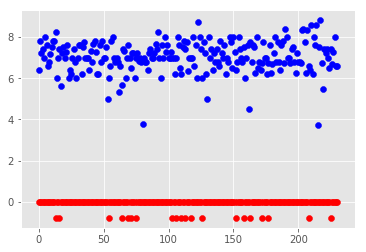

In [75]:
results = rnn.predict(x_test)

plt.scatter(range(231), results, c='r')
plt.scatter(range(231), y_test, c='b')
plt.show()

### Plot the loss from our history

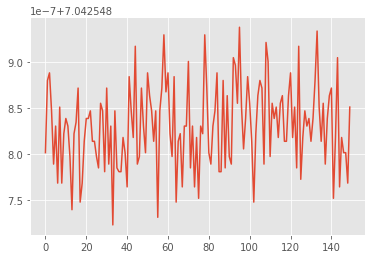

In [76]:
plt.plot(history.history['loss'])
plt.show()